### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Dataframes read from csv

In [2]:
scraped_df = pd.read_csv("data/scraping_results.csv")
cleaned_df = pd.read_csv("data/cleaned_dataset.csv")
normalized_df = pd.read_csv("data/normalized_dataset.csv")

### Get metadata per df

In [4]:
def get_info(df: pd.DataFrame):
    non_null_counts = df.count()
    dtypes = df.dtypes
    info = pd.DataFrame({
        'Column': non_null_counts.index,
        'Non-Null Count': non_null_counts.values,
        'Dtype': dtypes.astype(str).values  # Ensure dtype is captured as strings
    })
    return info


scraped_info = get_info(scraped_df)
cleaned_info = get_info(cleaned_df)
normalized_info = get_info(normalized_df)

shape_info = {
    'DataFrame': ['Scraped Data', 'Cleaned Data', 'Normalized Data'],
    'Rows': [scraped_df.shape[0], cleaned_df.shape[0], normalized_df.shape[0]],  # Number of rows
    'Columns': [scraped_df.shape[1], cleaned_df.shape[1], normalized_df.shape[1]]  # Number of columns
}

### 1. Number of rows and columns

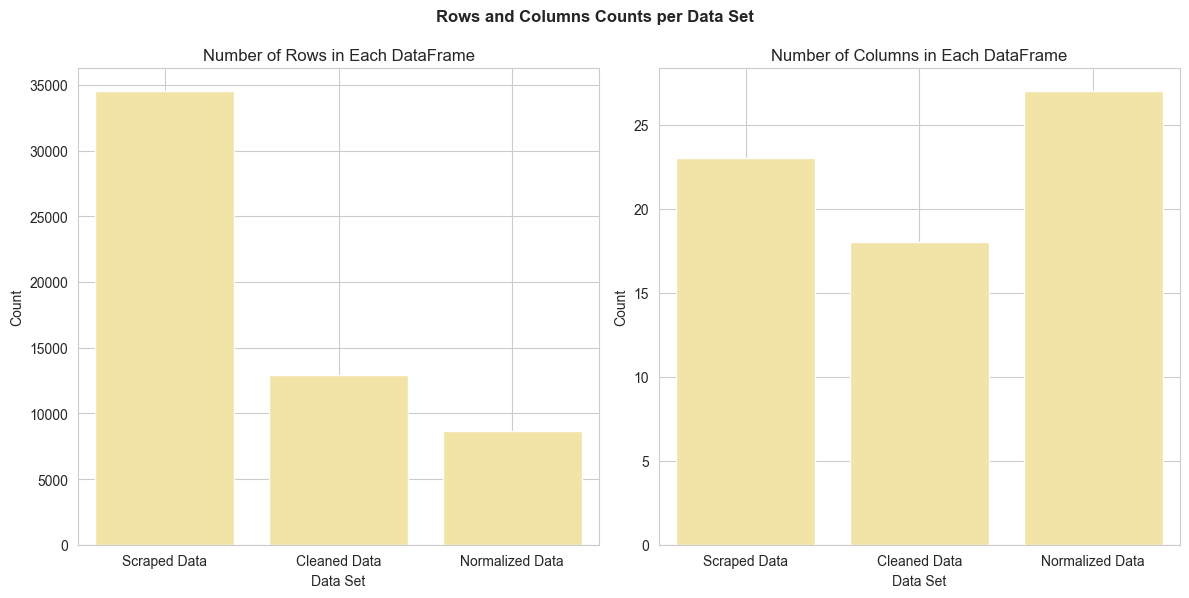

In [23]:
info_df = pd.DataFrame(shape_info)
sns.set_palette("YlOrRd")
# Set up the matplotlib figure with subplots (2 side by side)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
plt.suptitle("Rows and Columns Counts per Data Set", fontweight="bold", y=0.99)
# Bar plot for the number of rows
sns.barplot(x='DataFrame', y='Rows', data=info_df, ax=axes[0])
axes[0].set_title('Number of Rows in Each DataFrame')
axes[0].set_ylabel('Count')
axes[0].set_xlabel('Data Set')

# Bar plot for the number of columns
sns.barplot(x='DataFrame', y='Columns', data=info_df, ax=axes[1])
axes[1].set_title('Number of Columns in Each DataFrame')
axes[1].set_ylabel('Count')
axes[1].set_xlabel('Data Set')

# Show grid for both plots
for ax in axes:
    ax.grid(True)

# Adjust layout
plt.tight_layout()

# Save the plot as an image file
plt.savefig('Plots/1. rows_columns_barplots.png', format='png', dpi=300)  # Save plot as PNG
plt.show()

### 2. Non-Null Values per data set (hue=dtype)

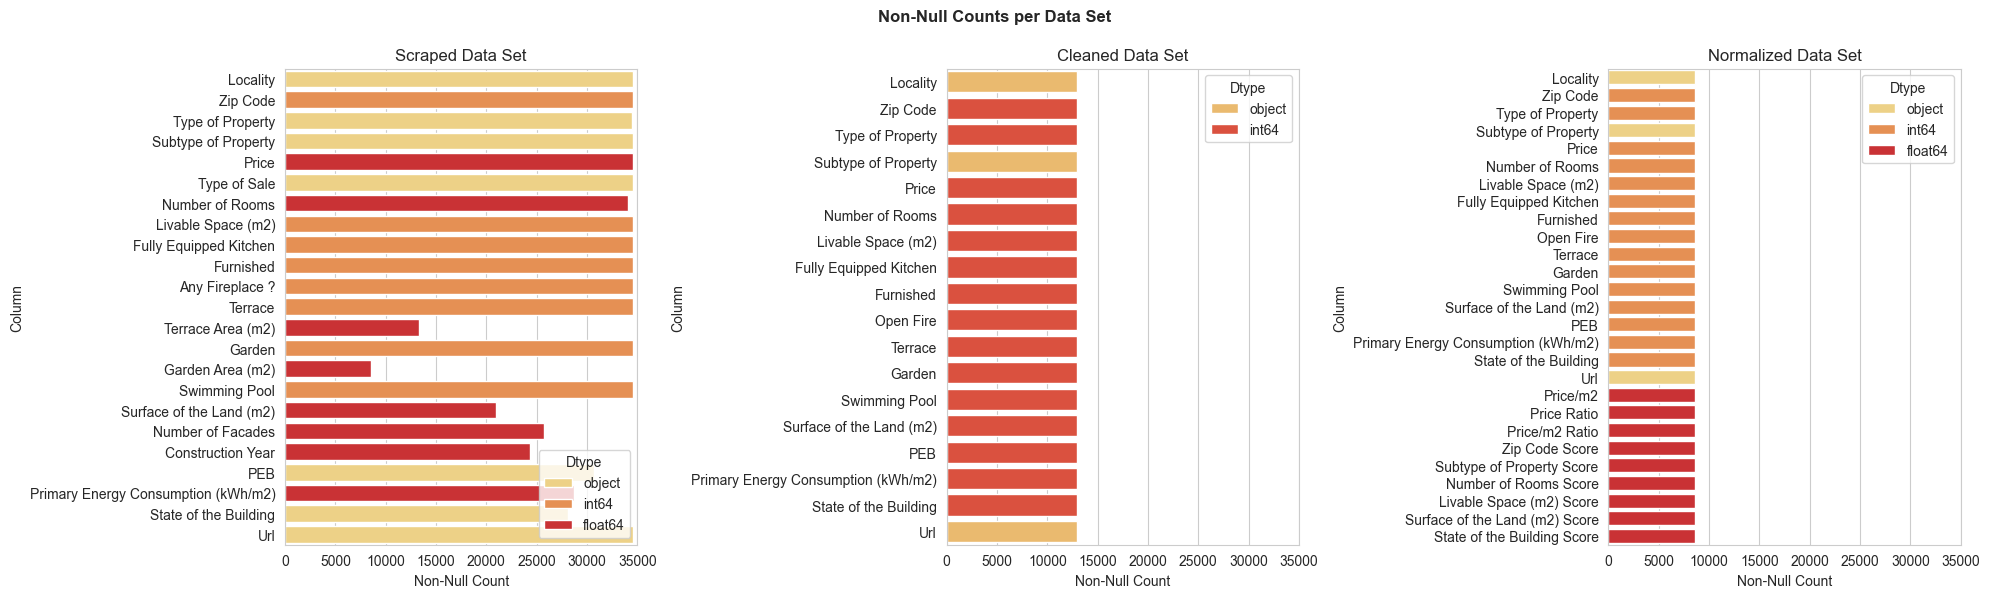

In [24]:
# Combine the results into a single DataFrame for plotting
dfs_info = [("Scraped", scraped_info), ("Cleaned", cleaned_info), ("Normalized", normalized_info)]

# Create a figure with subplots for each DataFrame
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
plt.suptitle("Non-Null Counts per Data Set", y=0.99, fontweight="bold")
for ax, (df_name, info) in zip(axes, dfs_info):
    sns.barplot(x='Non-Null Count', y='Column', data=info, ax=ax, palette='YlOrRd', hue = "Dtype")
    ax.set_title(f'{df_name} Data Set')
    ax.set_xlabel('Non-Null Count')
    ax.set_ylabel('Column')
    ax.set_xlim(0, 35000)  # Set the x-axis limit to 35,000
plt.subplots_adjust(left=0.15, right=0.85, top=0.9, bottom=0.2, hspace=0.3)

plt.tight_layout()
plt.savefig('Plots/2. non_null_counts_dtypes.png', format='png', dpi=300)  # Save as PNG with 300 DPI
plt.show()

### 3. Non-Null Values per Data Set (Overview)

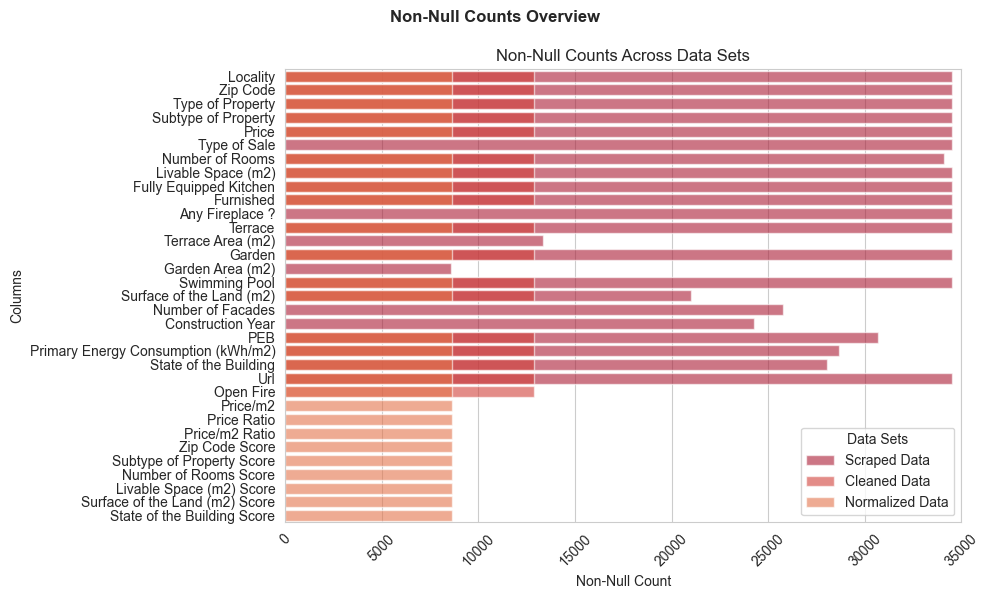

In [25]:
plt.figure(figsize=(10, 6))
sns.set_palette("YlOrRd_r")
plt.suptitle("Non-Null Counts Overview", fontweight="bold", y = 0.99)
# Plotting each DataFrame's non-null counts
sns.barplot(y='Column', x='Non-Null Count', data=scraped_info, label='Scraped Data', alpha=0.6)
sns.barplot(y='Column', x='Non-Null Count', data=cleaned_info, label='Cleaned Data', alpha=0.6)
sns.barplot(y='Column', x='Non-Null Count', data=normalized_info, label='Normalized Data', alpha=0.6)

plt.title('Non-Null Counts Across Data Sets')
plt.xlabel('Non-Null Count')
plt.ylabel('Columns')
plt.xlim(0, 35000)  # Adjust xlim for aesthetics
plt.xticks(rotation=45)
plt.legend(title='Data Sets')

# Set maximum limit for the x-axis
plt.xlim(0, 35000)
plt.tight_layout()
plt.savefig('Plots/3. non_null_counts.png', format='png', dpi=300)  # Save as PNG with 300 DPI


# 4. Percentage Null per Column for each Data Set

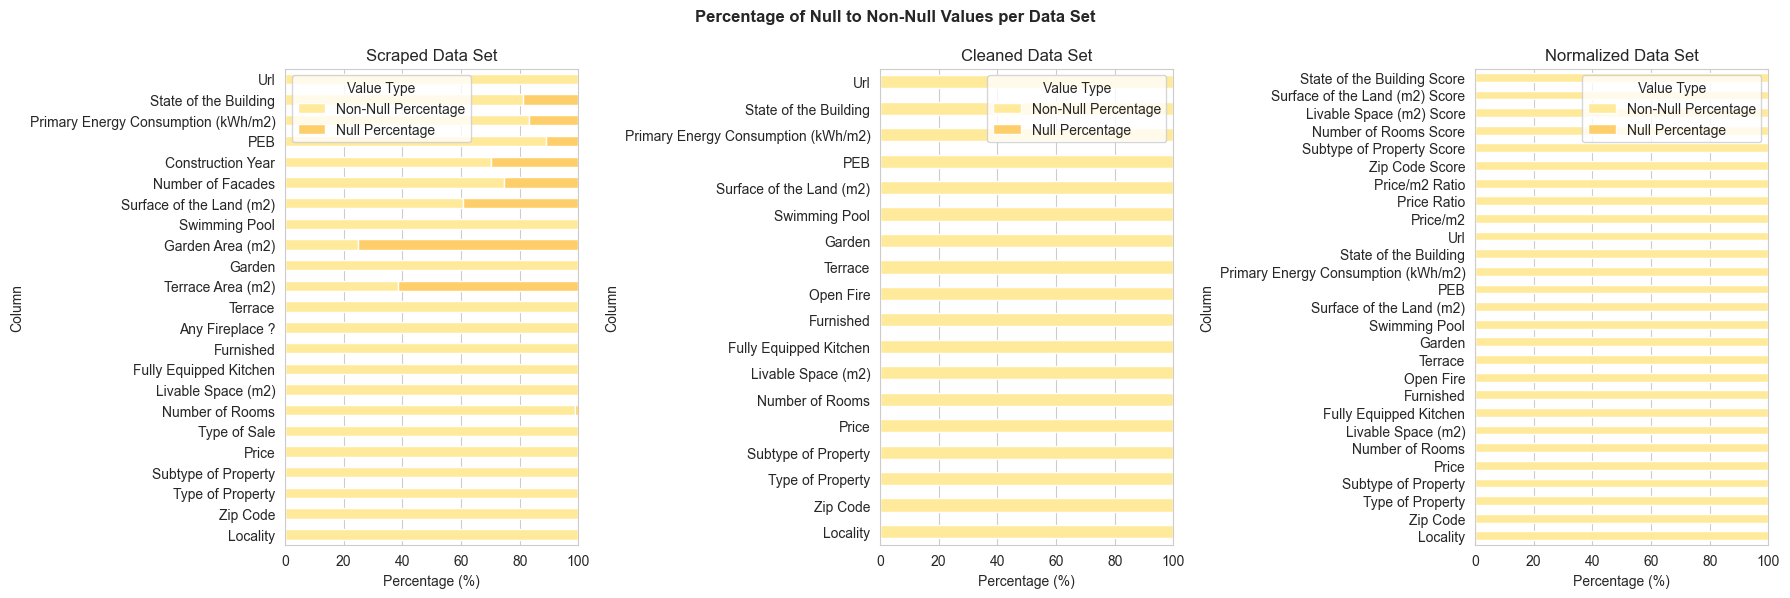

In [26]:
# Function to calculate percentages and prepare data for plotting
def prepare_percentage_data(info, total_rows):
    info['Null Count'] = total_rows - info['Non-Null Count']
    info['Non-Null Percentage'] = (info['Non-Null Count'] / total_rows) * 100
    info['Null Percentage'] = (info['Null Count'] / total_rows) * 100
    return info[['Column', 'Non-Null Percentage', 'Null Percentage']]

# Total rows for each DataFrame
total_scraped = scraped_df.shape[0]
total_cleaned = cleaned_df.shape[0]
total_normalized = normalized_df.shape[0]

# Prepare the data for each DataFrame
scraped_percentages = prepare_percentage_data(scraped_info, total_scraped)
cleaned_percentages = prepare_percentage_data(cleaned_info, total_cleaned)
normalized_percentages = prepare_percentage_data(normalized_info, total_normalized)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
plt.suptitle("Percentage of Null to Non-Null Values per Data Set", y=0.99, fontweight="bold")

sns.set_palette("YlOrRd")
# Create the horizontal stacked bar charts for each DataFrame
for ax, percentages, label in zip(axes, [scraped_percentages, cleaned_percentages, normalized_percentages],
                                  ['Scraped', 'Cleaned', 'Normalized']):
    percentages.set_index('Column')[['Non-Null Percentage', 'Null Percentage']].plot(kind='barh', stacked=True, ax=ax)
    ax.set_title(f'{label} Data Set')
    ax.set_xlabel('Percentage (%)')
    ax.set_xlim(0, 100)  # Set x-limit from 0 to 100
    ax.legend(title='Value Type')

plt.savefig("Plots/4. Percentage Null to Non-Null.png", format='png', dpi=300)
plt.tight_layout() 
plt.show()

### 5. Scatterplot per Data Set Liveable Surface vs. Price

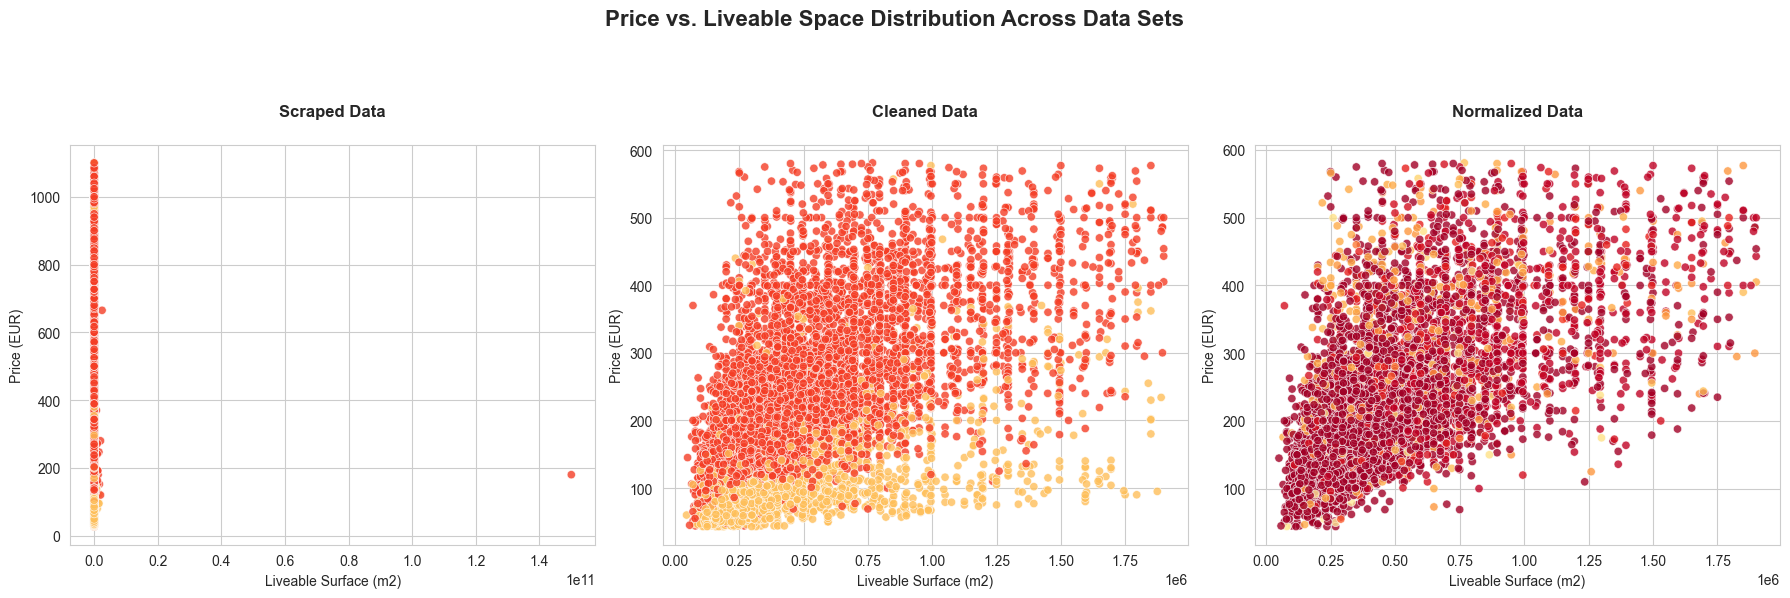

In [27]:
plt.figure(figsize=(18, 6))
plt.suptitle('Price vs. Liveable Space Distribution Across Data Sets', fontsize=16, fontweight='bold', y=0.99)

# First plot
plt.subplot(1, 3, 1)  # 1 row, 3 columns, first subplot
sns.scatterplot(data=scraped_df, y='Livable Space (m2)', x='Price', hue="Type of Property", palette="YlOrRd", alpha=0.8)
plt.title('Scraped Data', y=1.05, fontweight="bold")
plt.xlabel('Liveable Surface (m2)')
plt.ylabel('Price (EUR)')
plt.legend().remove()  # Remove the legend

# Second plot
plt.subplot(1, 3, 2)  # 1 row, 3 columns, second subplot
sns.scatterplot(data=cleaned_df, y='Livable Space (m2)', x='Price', hue="Type of Property", palette="YlOrRd", alpha=0.8)
plt.title('Cleaned Data', y=1.05, fontweight="bold")
plt.xlabel('Liveable Surface (m2)')
plt.ylabel('Price (EUR)')
plt.legend().remove()  # Remove the legend

# Third plot
plt.subplot(1, 3, 3)  # 1 row, 3 columns, third subplot
sns.scatterplot(data=normalized_df, y='Livable Space (m2)', x='Price', hue="Subtype of Property", palette="YlOrRd_r", alpha=0.8)
plt.title('Normalized Data', y=1.05, fontweight="bold")
plt.xlabel('Liveable Surface (m2)')
plt.ylabel('Price (EUR)')
plt.legend().remove()  # Remove the legend

plt.savefig("Plots/5. Price vs. Liveable Space Distribution Across Data Sets.png", format="png", dpi=300)
# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.92])  # Adjust layout to make room for suptitle
plt.show()